# TP scientific analisys

## Natalia Debandi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO


In [2]:
#leo el archivo desde mi computadora
online = False
if (online == True):
    url = requests.get('https://drive.google.com/file/d/1xS091zSODR9431r7GNJI4IYHoFRCCQCr/view?usp=sharing')
    csv_raw = StringIO(url.text)
    signals = pd.read_csv(csv_raw, delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])
else:
    signals = pd.read_csv('C:\\Users\\natal\\OneDrive\\Nat2022\\Analisis datos\\datasets\\datos-cientificos\\eeg.dat', delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])

##lo guarde en el proyecto
##base = pd.read_csv('TPfinal\\data\\eeg.dat', delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])

print('Estructura de la informacion :')
print('signals')
print(signals.head())

Estructura de la informacion :
signals
      timestamp  counter  eeg  attention  meditation  blinking
0  1.655925e+09       68   32          0           0         0
1  1.655925e+09       69   40          0           0         0
2  1.655925e+09       70   42          0           0         0
3  1.655925e+09       71   34          0           0         0
4  1.655925e+09       72   24          0           0         0


In [3]:
##tomo los valores de eeg en un tensor de nunpy
data=signals.values
eeg_val=data[:,2]
print(eeg_val)

[ 32.  40.  42. ...  91. 114. 103.]


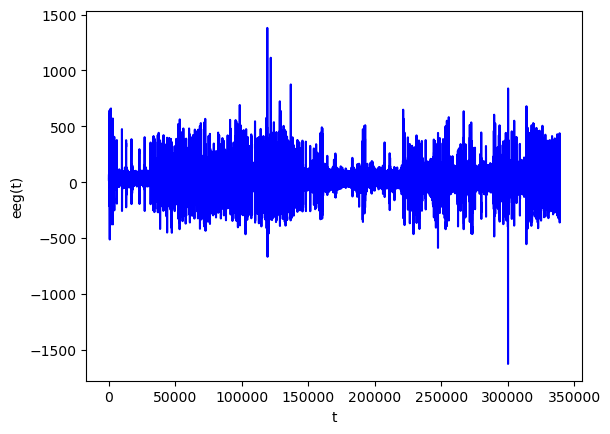

In [4]:
plt.plot(eeg_val,'b', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');

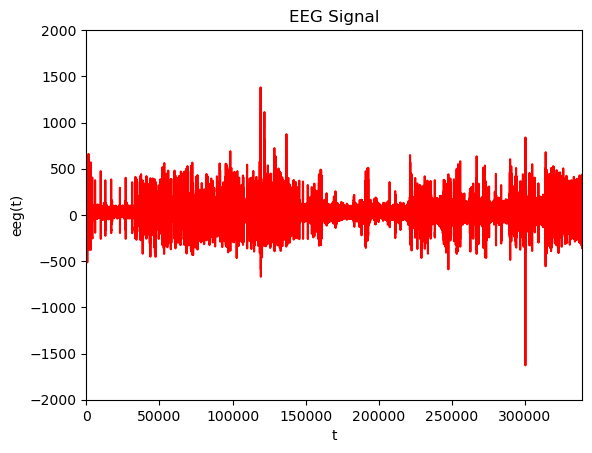

In [5]:
plt.plot(eeg_val,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'EEG Signal')
plt.ylim([-2000, 2000]);
plt.xlim([0,len(eeg_val)])
plt.show()


In [6]:
signals.describe()

,timestamp,counter,eeg,attention,meditation,blinking
count,3.393010e+05,339301.000000,339301.000000,339301.000000,339301.000000,339301.0
mean,1.655925e+09,49.501127,31.001577,64.062720,41.658757,0.0
std,1.905190e+02,28.867526,90.962463,21.247321,17.424993,0.0
min,1.655925e+09,0.000000,-1628.000000,0.000000,0.000000,0.0
25%,1.655925e+09,24.000000,3.000000,47.000000,29.000000,0.0
50%,1.655925e+09,50.000000,33.000000,64.000000,41.000000,0.0
75%,1.655925e+09,75.000000,60.000000,81.000000,53.000000,0.0
max,1.655925e+09,99.000000,1380.000000,100.000000,100.000000,0.0


In [7]:
#import seaborn as sns
#sns.set(style="darkgrid")
#sns.lineplot(x="timestamp", y="eeg", hue="attention", data=signals)
#import matplotlib.pyplot as plt
#plt.show()

# Separación de la señal segun el tiempo

Marqué los tiempos en el video, cada tramo tiene una duracion de 60 seg aproximadamente y está separada por pestañeos.Voy a intentar tomar la parte central de los tramos para que este más limpia de los pestañeos. 50 segundos será mi ventana y 10 segundos descartados.

In [8]:
#quiero pasar el timestamp a fecha para poder sincronizar con el video

from datetime import datetime
signals.loc[1].iat[0]
fecha=datetime.fromtimestamp(signals.loc[1].iat[0])
print(fecha)

2022-06-22 16:06:04.970000


In [9]:
signals.dtypes
signals['date']=pd.to_datetime(signals['timestamp'], unit='s')
signals.head()

,timestamp,counter,eeg,attention,meditation,blinking,date
0,1.655925e+09,68,32,0,0,0,2022-06-22 19:06:04.970000128
1,1.655925e+09,69,40,0,0,0,2022-06-22 19:06:04.970000128
2,1.655925e+09,70,42,0,0,0,2022-06-22 19:06:04.970000128
3,1.655925e+09,71,34,0,0,0,2022-06-22 19:06:04.970000128
4,1.655925e+09,72,24,0,0,0,2022-06-22 19:06:04.970000128


El primer valor de la serie es 2022-06-22 19:06 mientras que el video arranca en el 2022-06-22 20:05.
El maximo valor de date es '2022-06-22 19:17:04.920000'

In [10]:
##reviso la diferencia entre los horarios para ver como sincronizar con el video
from datetime import datetime, timedelta

#create new column that contains timedelta between start and end
diff =  pd.to_datetime('2022-06-22 20:05') -  pd.to_datetime('2022-06-22 19:06')
#print(diff)

result = signals['date'].iat[0] + timedelta(minutes=59)
print(result)

2022-06-22 20:05:04.970000128


In [11]:
# sumo la diferencia de 59 minutos para sincronizar mejor con el video
signals['date']=signals['date'] + timedelta(minutes=59)
#signals.head()

In [12]:
#signals_filtered=signals[]
#import seaborn as sns
#import matplotlib.pyplot as plt
#sns.set(style="darkgrid")
#sns.lineplot(x="date", y="eeg", data=signals)
#plt.show()


## Señal baseline
Para tomar la señal de baseline voy a seleccionar 50 segundos, de modo que esté equilibrado con el conjunto de Tos entre las 06:25 y 07:15 que arranca la tos.
En las primeras pruebas tome 60 segundos y me parece que quedaban los pestañeos. Busco con esto tomar la parte mas pura con solo esa información para los clasificadores.

In [13]:
#quiero filtrar una parte de la señal
signals_baseline=signals[(signals.date >'2022-06-22 20:06:25') & (signals.date <'2022-06-22 20:07:15')]
signals_baseline.head()
#signals_baseline.describe()

,timestamp,counter,eeg,attention,meditation,blinking,date
41160,1.655925e+09,48,-30,63,41,0,2022-06-22 20:06:25.029999872
41161,1.655925e+09,49,3,63,41,0,2022-06-22 20:06:25.029999872
41162,1.655925e+09,50,9,63,41,0,2022-06-22 20:06:25.029999872
41163,1.655925e+09,51,-50,63,41,0,2022-06-22 20:06:25.029999872
41164,1.655925e+09,52,-72,63,41,0,2022-06-22 20:06:25.029999872


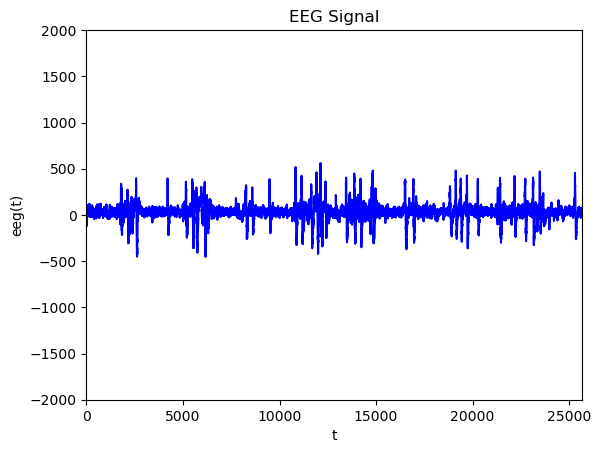

In [14]:
data=signals_baseline.values
eeg_val=data[:,2]
plt.plot(eeg_val,'b', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'EEG Signal')
plt.ylim([-2000, 2000]);
plt.xlim([0,len(eeg_val)])
plt.show()

# Señal con tos

Son 50 segundos desde 07:25. 

In [15]:
#filtro los datos de tos
signals_tos=signals[(signals.date >'2022-06-22 20:07:25') & (signals.date <'2022-06-22 20:08:15')]
signals_tos.head()
#signals_tos.describe()

,timestamp,counter,eeg,attention,meditation,blinking,date
72000,1.655925e+09,28,83,57,16,0,2022-06-22 20:07:25.009999872
72001,1.655925e+09,29,-1,57,16,0,2022-06-22 20:07:25.009999872
72002,1.655925e+09,30,-1,57,16,0,2022-06-22 20:07:25.009999872
72003,1.655925e+09,31,34,57,16,0,2022-06-22 20:07:25.009999872
72004,1.655925e+09,32,81,57,16,0,2022-06-22 20:07:25.009999872


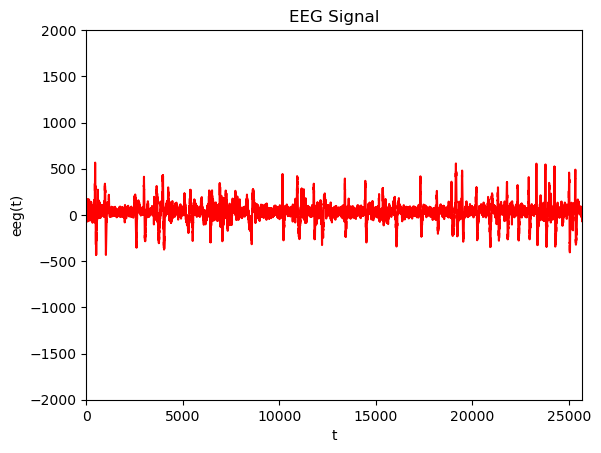

In [16]:
data=signals_tos.values
eeg_val=data[:,2]
plt.plot(eeg_val,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'EEG Signal')
plt.ylim([-2000, 2000]);
plt.xlim([0,len(eeg_val)])
plt.show()

## filtros y mejoras

En las primeras pruebas no hubo buena detección de los clasificadores. Voy a intentar mejorar la señal aplicando un filtro de convolución y usando la función de getbaseline.

In [17]:
from scipy.interpolate import interp1d

def getBaseline(eeg):

    # Get 100 points from 0 .. len(eeg)  [0,123,340,...,len(eeg)]
    x = range(0,len(eeg),100)
    y = eeg[x]                                                  # Get the signal values on those points
    f = interp1d(x, y,fill_value="extrapolate")                 # Estimate a function that will interpolate those points. 
                                                            # This will estimate a waveform based solely on those points.   
    f2 = interp1d(x, y, kind='cubic',fill_value="extrapolate")  # Replicate the same with a cubic function

    # Now regenerate the signal based on the estimated function 'f' and get a signal from that.
    baseline = f(range(len(eeg)))

    # Finally, substract those points from the original signal.
    return(baseline)

In [18]:
#FILTROS Y BASELINE A BASELINE
#aplico la funcion getbaseline y la de eliminar ruido por medio de convolución
data=signals_baseline.values
eeg_val=data[:,2]
eeg_val=eeg_val-getBaseline(eeg_val)

#filtro convolución
windowlength = 10
eeg_val = np.convolve(eeg_val, np.ones((windowlength,))/windowlength, mode='same')
print(eeg_val)
signals_baseline['eeg_val']=eeg_val
signals_baseline.head()

[0.16999999999999993 -2.645 -5.243 ... -23.444000000000003
 -19.442000000000004 -16.314000000000004]


C:\Users\natal\AppData\Local\Temp\ipykernel_13748\1084051538.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals_baseline['eeg_val']=eeg_val


,timestamp,counter,eeg,attention,meditation,blinking,date,eeg_val
41160,1.655925e+09,48,-30,63,41,0,2022-06-22 20:06:25.029999872,0.17
41161,1.655925e+09,49,3,63,41,0,2022-06-22 20:06:25.029999872,-2.645
41162,1.655925e+09,50,9,63,41,0,2022-06-22 20:06:25.029999872,-5.243
41163,1.655925e+09,51,-50,63,41,0,2022-06-22 20:06:25.029999872,-9.624
41164,1.655925e+09,52,-72,63,41,0,2022-06-22 20:06:25.029999872,-17.088


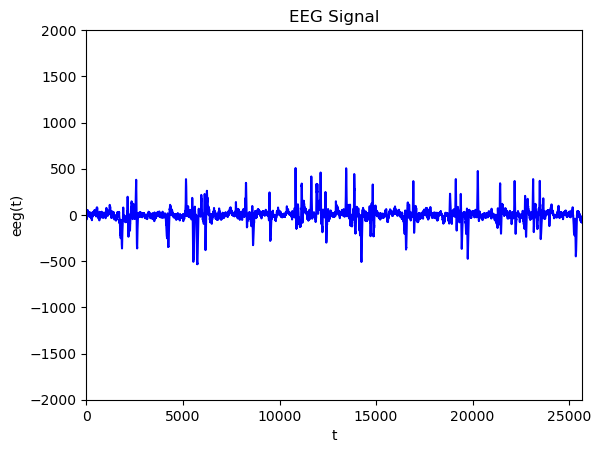

In [19]:
plt.plot(eeg_val,'b', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'EEG Signal')
plt.ylim([-2000, 2000]);
plt.xlim([0,len(eeg_val)])
plt.show()

[-20.83 -18.794999999999998 -18.153 ... 43.408000000000015
 38.179000000000016 34.08300000000001]


C:\Users\natal\AppData\Local\Temp\ipykernel_13748\3459024866.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals_tos['eeg_val']=eeg_val


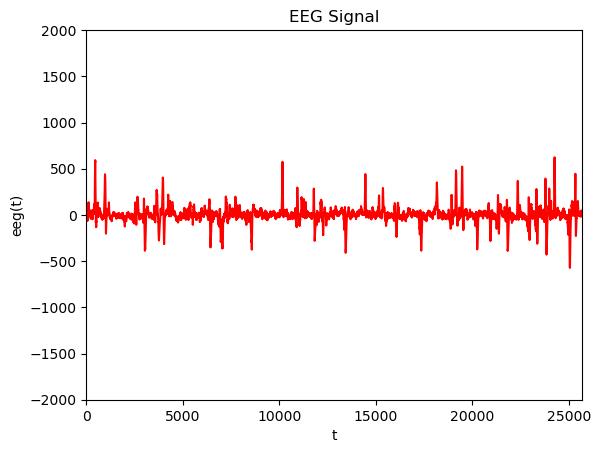

In [20]:
#FILTROS Y BASELINE A TOS
#aplico la funcion getbaseline y la de eliminar ruido por medio de convolución
data=signals_tos.values
eeg_val=data[:,2]
eeg_val=eeg_val-getBaseline(eeg_val)

#filtro convolución
windowlength = 10
eeg_val = np.convolve(eeg_val, np.ones((windowlength,))/windowlength, mode='same')
print(eeg_val)
signals_tos['eeg_val']=eeg_val
#signals_tos.head()

plt.plot(eeg_val,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'EEG Signal')
plt.ylim([-2000, 2000]);
plt.xlim([0,len(eeg_val)])
plt.show()


In [21]:
signals_tos.head()

,timestamp,counter,eeg,attention,meditation,blinking,date,eeg_val
72000,1.655925e+09,28,83,57,16,0,2022-06-22 20:07:25.009999872,-20.83
72001,1.655925e+09,29,-1,57,16,0,2022-06-22 20:07:25.009999872,-18.795
72002,1.655925e+09,30,-1,57,16,0,2022-06-22 20:07:25.009999872,-18.153
72003,1.655925e+09,31,34,57,16,0,2022-06-22 20:07:25.009999872,-21.404
72004,1.655925e+09,32,81,57,16,0,2022-06-22 20:07:25.009999872,-27.848


# Reconstruccion de señal con etiquetas
Reconstruyo una señal con la parte del baseline y de la tos nada más con la etiqueta de tos (1). Voy a trabajar analizando esta señal mas chica para probar aplicar filtros y extraer features.

In [22]:
zz=np.zeros(signals_baseline['date'].size,dtype=int)
signals_baseline = signals_baseline.assign(tos=zz)
#print(zz)
signals_baseline.head()

,timestamp,counter,eeg,attention,meditation,blinking,date,eeg_val,tos
41160,1.655925e+09,48,-30,63,41,0,2022-06-22 20:06:25.029999872,0.17,0
41161,1.655925e+09,49,3,63,41,0,2022-06-22 20:06:25.029999872,-2.645,0
41162,1.655925e+09,50,9,63,41,0,2022-06-22 20:06:25.029999872,-5.243,0
41163,1.655925e+09,51,-50,63,41,0,2022-06-22 20:06:25.029999872,-9.624,0
41164,1.655925e+09,52,-72,63,41,0,2022-06-22 20:06:25.029999872,-17.088,0


In [23]:
zz=np.ones(signals_tos['date'].size,dtype=int)
signals_tos = signals_tos.assign(tos=zz)
#print(zz)
signals_tos.head()

,timestamp,counter,eeg,attention,meditation,blinking,date,eeg_val,tos
72000,1.655925e+09,28,83,57,16,0,2022-06-22 20:07:25.009999872,-20.83,1
72001,1.655925e+09,29,-1,57,16,0,2022-06-22 20:07:25.009999872,-18.795,1
72002,1.655925e+09,30,-1,57,16,0,2022-06-22 20:07:25.009999872,-18.153,1
72003,1.655925e+09,31,34,57,16,0,2022-06-22 20:07:25.009999872,-21.404,1
72004,1.655925e+09,32,81,57,16,0,2022-06-22 20:07:25.009999872,-27.848,1


In [24]:
##uno los dos subconjuntos
signals2=pd.concat([signals_baseline, signals_tos])
signals2.head()

,timestamp,counter,eeg,attention,meditation,blinking,date,eeg_val,tos
41160,1.655925e+09,48,-30,63,41,0,2022-06-22 20:06:25.029999872,0.17,0
41161,1.655925e+09,49,3,63,41,0,2022-06-22 20:06:25.029999872,-2.645,0
41162,1.655925e+09,50,9,63,41,0,2022-06-22 20:06:25.029999872,-5.243,0
41163,1.655925e+09,51,-50,63,41,0,2022-06-22 20:06:25.029999872,-9.624,0
41164,1.655925e+09,52,-72,63,41,0,2022-06-22 20:06:25.029999872,-17.088,0


Grafico con eeg_val que es la señal filtrada y a la que se extrajo el baseline

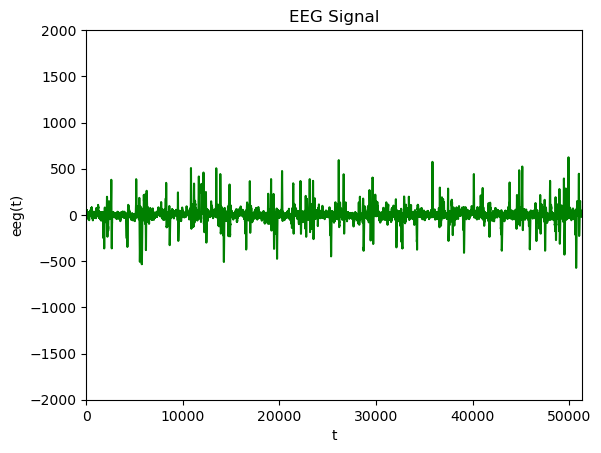

In [25]:
data=signals2.values
eeg_val=data[:,7]
plt.plot(eeg_val,'g', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'EEG Signal')
plt.ylim([-2000, 2000]);
plt.xlim([0,len(eeg_val)])
plt.show()

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set(style="darkgrid")
#sns.lineplot(x="date", y="eeg_val",  hue="tos", data=signals2)
#plt.show()

La señal conjunta se ve suavizada y también se ve el corte de 10 segundos entre cada fragmento

No parece haber cambios muy significativos al aplicar el filtro de ruido.

# Extracción de features de la señal

Voy a realizar la extracción de features de cada señal por separado y voy a utilizar eeg_val:
- signals_baseline
- signals_tos



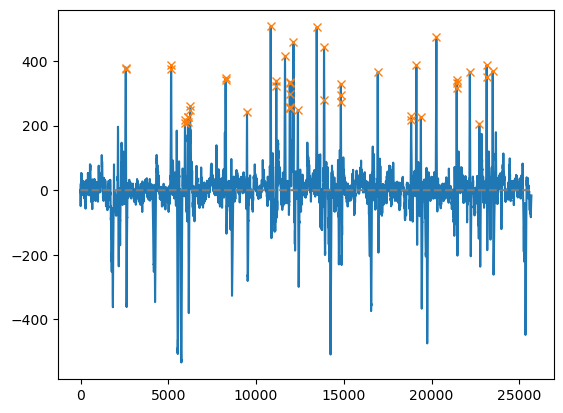

In [28]:
#lo primero quiero identificar los picos de signals_baseline
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

data = signals_baseline.values
eeg_val = data[:,7]

peaks, _ = find_peaks(eeg_val, height=200)
plt.plot(eeg_val,label='EEG peaks - signals_baseline')
plt.plot(peaks, eeg_val[peaks], "x")
plt.plot(np.zeros_like(eeg_val), "--", color="gray")
plt.show()

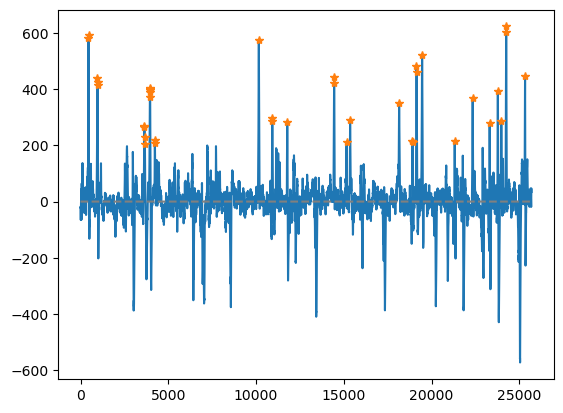

In [29]:
#lo primero quiero identificar los picos de signals_tos

data = signals_tos.values
eeg_val = data[:,7]

peaks, _ = find_peaks(eeg_val, height=200)
plt.plot(eeg_val, label='EEG peaks - signals_tos')
plt.plot(peaks, eeg_val[peaks], "*")
plt.plot(np.zeros_like(eeg_val), "--", color="gray")
plt.show()

In [30]:
#funciones para extraer features

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.fftpack import fft

import math

from scipy.signal import firwin, remez, kaiser_atten, kaiser_beta
from scipy.signal import butter, filtfilt, buttord

from scipy.signal import butter, lfilter

import matplotlib.pyplot as plt

from scipy.fft import rfft, rfftfreq

def crest_factor(x):
    return np.max(np.abs(x))/np.sqrt(np.mean(np.square(x)))

def hjorth(a):
    r"""
    Compute Hjorth parameters [HJO70]_.
    .. math::
        Activity = m_0 = \sigma_{a}^2
    .. math::
        Complexity = m_2 = \sigma_{d}/ \sigma_{a}
    .. math::
        Morbidity = m_4 =  \frac{\sigma_{dd}/ \sigma_{d}}{m_2}
    Where:
    :math:`\sigma_{x}^2` is the mean power of a signal :math:`x`. That is, its variance, if it's mean is zero.
    :math:`a`, :math:`d` and :math:`dd` represent the original signal, its first and second derivatives, respectively.
    .. note::
        **Difference with PyEEG:**
        Results is different from [PYEEG]_ which appear to uses a non normalised (by the length of the signal) definition of the activity:
        .. math::
            \sigma_{a}^2 = \sum{\mathbf{x}[i]^2}
        As opposed to
        .. math::
            \sigma_{a}^2 = \frac{1}{n}\sum{\mathbf{x}[i]^2}
    :param a: a one dimensional floating-point array representing a time series.
    :type a: :class:`~numpy.ndarray` or :class:`~pyrem.time_series.Signal`
    :return: activity, complexity and morbidity
    :rtype: tuple(float, float, float)
    Example:
    >>> import pyrem as pr
    >>> import numpy as np
    >>> # generate white noise:
    >>> noise = np.random.normal(size=int(1e4))
    >>> activity, complexity, morbidity = pr.univariate.hjorth(noise)
    """

    first_deriv = np.diff(a)
    second_deriv = np.diff(a,2)

    var_zero = np.mean(a ** 2)
    var_d1 = np.mean(first_deriv ** 2)
    var_d2 = np.mean(second_deriv ** 2)

    activity = var_zero
    morbidity = np.sqrt(var_d1 / var_zero)
    complexity = np.sqrt(var_d2 / var_d1) / morbidity

    return activity, morbidity, complexity

def pfd(a):
    r"""
    Compute Petrosian Fractal Dimension of a time series [PET95]_.
    It is defined by:
    .. math::
        \frac{log(N)}{log(N) + log(\frac{N}{N+0.4N_{\delta}})}
    .. note::
        **Difference with PyEEG:**
        Results is different from [PYEEG]_ which implemented an apparently erroneous formulae:
        .. math::
            \frac{log(N)}{log(N) + log(\frac{N}{N}+0.4N_{\delta})}
    Where:
    :math:`N` is the length of the time series, and
    :math:`N_{\delta}` is the number of sign changes.
    :param a: a one dimensional floating-point array representing a time series.
    :type a: :class:`~numpy.ndarray` or :class:`~pyrem.time_series.Signal`
    :return: the Petrosian Fractal Dimension; a scalar.
    :rtype: float
    Example:
    >>> import pyrem as pr
    >>> import numpy as np
    >>> # generate white noise:
    >>> noise = np.random.normal(size=int(1e4))
    >>> pr.univariate.pdf(noise)
    """

    diff = np.diff(a)
    # x[i] * x[i-1] for i in t0 -> tmax
    prod = diff[1:-1] * diff[0:-2]

    # Number of sign changes in derivative of the signal
    N_delta = np.sum(prod < 0)
    n = len(a)

    return np.log(n)/(np.log(n)+np.log(n/(n+0.4*N_delta)))

## creo los dos vectores de features uno para baseline y otro para tos

In [31]:
from collections import Counter
from scipy import stats

len(signals_baseline)/512
len(signals_tos)/512

50.185546875

In [32]:
##creo una funcion para obtener los features a partir de un vector de nunpy de frecuencia

def getfeatures(eeg_in):
    features=[]
    ptp = abs(np.max(eeg_in)) + abs(np.min(eeg_in))
    features.insert(1,ptp)

    rms = np.sqrt(np.mean(eeg_in**2))
    features.insert(1,rms)

    cf = crest_factor(eeg_in)
    features.insert(1,cf)

    entropy = stats.entropy(list(Counter(eeg_in).values()), base=2)
    features.insert(1,entropy)

    activity, complexity, morbidity = hjorth(eeg_in)
    features.insert(1,activity)
    features.insert(1,complexity)
    features.insert(1,morbidity)
    fractal = pfd(eeg_in)
    features.insert(1,fractal)
    return features

In [33]:
#signals_baseline.head()
print(signals_baseline.iloc[0:1024,:])
s_temp=signals_baseline.iloc[0:1024,:]
data = s_temp.values
eeg = data[:,7]
#print(eeg)
features_baseline=getfeatures(eeg)
print('aqui')
print(features_baseline)

          timestamp  counter  eeg  attention  meditation  blinking  \
41160  1.655925e+09       48  -30         63          41         0   
41161  1.655925e+09       49    3         63          41         0   
41162  1.655925e+09       50    9         63          41         0   
41163  1.655925e+09       51  -50         63          41         0   
41164  1.655925e+09       52  -72         63          41         0   
...             ...      ...  ...        ...         ...       ...   
42179  1.655925e+09       75   86         56          38         0   
42180  1.655925e+09       76  105         56          38         0   
42181  1.655925e+09       77  104         56          38         0   
42182  1.655925e+09       78  100         56          38         0   
42183  1.655925e+09       79   92         56          38         0   

                               date eeg_val  tos  
41160 2022-06-22 20:06:25.029999872    0.17    0  
41161 2022-06-22 20:06:25.029999872  -2.645    0  
41162 

In [34]:
##defino una funcion que me calcula los features segun el tamaño de la ventana 
def features_signals(signal,ventana):
    i=0
    features=[]
    N_signals=signal.timestamp.count()
    #print(N_signals)
    while i<N_signals:
     #   print(i)
        s_temp = signal.iloc[i:i+ventana,:]
        #print(s_temp['date'])
        data = s_temp.values
        eeg = data[:,7]
        f_temp=getfeatures(eeg)
      #  print(f_temp)
        features.append(f_temp)
        i=i+ventana
    return(features)

In [35]:
##voy a tomar los features con una ventana de 2 segundos y durante la señal que son 60 segundos.


#son 512 muestras por segundo
freq=512
#hago una ventana de 2 segundos para cada feature
ventana=freq*2  

features_baseline=features_signals(signals_baseline,ventana)
features_tos=features_signals(signals_tos,ventana)



In [36]:
import sys, select

import platform
import socket
#import gevent

import time
import datetime
import os

from scipy.fftpack import fft

import math

from scipy.signal import firwin, remez, kaiser_atten, kaiser_beta
from scipy.signal import butter, filtfilt, buttord

from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

from scipy.signal import butter, lfilter

In [37]:
#pip install tensorflow==1.2.0 --ignore-installed

In [38]:
#pip install keras
import tensorflow
import keras

In [39]:
def classify(afeatures1, afeatures2, featuresize):

    print ('Feature 1 Size %d,%d' % (afeatures1.shape))
    print ('Feature 2 Size %d,%d' % (afeatures2.shape))

   # afeatures1 = reshapefeature(afeatures1, featuresize)
  #  afeatures2 = reshapefeature(afeatures2, featuresize)

    featuredata = np.concatenate ((afeatures1,afeatures2))
    featurelabels = np.concatenate( (np.zeros(afeatures1.shape[0]),(np.zeros(afeatures2.shape[0])+1) )  )

    boundary = int(featuredata.shape[0]/2.0)

    print ('Boundary %d:' % boundary)

    # Reshape and shuffle the features
    reorder = np.random.permutation(featuredata.shape[0])

    trainingdata = featuredata[reorder[0:boundary]]
    traininglabels = featurelabels[reorder[0:boundary]]

    testdata = featuredata[reorder[boundary+1:featuredata.shape[0]]]
    testlabels = featurelabels[reorder[boundary+1:featuredata.shape[0]]]

    print ('Training Dataset Size %d,%d' % (trainingdata.shape))
    print ('Test Dataset Size %d,%d' % (testdata.shape))


    clf = svm.SVC(kernel='linear', C = 1.0)
    clf.fit(trainingdata,traininglabels)


    predlabels = clf.predict(testdata)
    C = confusion_matrix(testlabels, predlabels)
    acc = (float(C[0,0])+float(C[1,1])) / ( testdata.shape[0])
    print ('SVM Feature Dim: %d Accuracy: %f' % (featuresize,acc))
    print(C)

    target_names = ['baseline', 'Tos']
    report = classification_report(testlabels, predlabels, target_names=target_names)
    print(report)

    from sklearn.linear_model import LogisticRegression

    # all parameters not specified are set to their defaults
    logisticRegr = LogisticRegression()
    logisticRegr.fit(trainingdata,traininglabels)

    # Returns a NumPy Array
    # Predict for One Observation (image)
    predlabels = logisticRegr.predict(testdata)
   
    C = confusion_matrix(testlabels, predlabels)
    acc = (float(C[0,0])+float(C[1,1])) / ( testdata.shape[0])
    print ('LogReg Feature Dim: %d Accuracy: %f' % (featuresize,acc))
    print(C)

    target_names = ['baseline', 'Tos']
    report = classification_report(testlabels, predlabels, target_names=target_names)
    print(report)

    from keras.models import Sequential
    from keras.layers import Dense

    model = Sequential([
        Dense(64, activation='tanh', input_shape=(trainingdata.shape[1],)),
        Dense(32, activation='tanh'),
        Dense(1, activation='sigmoid'),
    ])
    model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

    hist = model.fit(trainingdata, traininglabels,
          batch_size=10, epochs=1000*trainingdata.shape[1],verbose=0,
          validation_split=0.4)

    predlabels = model.predict(testdata)
    #print(predlabels)
    predlabels = predlabels.round()
    #print(predlabels)
    C = confusion_matrix(testlabels, predlabels)
    acc = (float(C[0,0])+float(C[1,1])) / ( testdata.shape[0])
    print ('Keras Feature Dim: %d Accuracy: %f' % (featuresize,acc))
    print(C)

    print(model.evaluate(testdata,testlabels))
    print ('Keras Model Accuracy: %f' % (model.evaluate(testdata,testlabels)[1]))

    target_names = ['baseline', 'Tos']
    report = classification_report(testlabels, predlabels, target_names=target_names)
    print(report)

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()


    #plt.plot(hist.history['acc'])
    #plt.plot(hist.history['val_acc'])
    #plt.title('Model accuracy')
    #plt.ylabel('Accuracy')
    #plt.xlabel('Epoch')
    #plt.legend(['Train', 'Val'], loc='lower right')
    #plt.show()

(26, 8)
(26, 8)
[5.31340538e+02 1.01016587e+00 6.56975664e+00 8.13302137e-02
 8.48094424e+03 9.84239529e+00 3.80272643e+00 8.33687260e+01]
[5.37850192e+02 1.01086067e+00 7.03805215e+00 7.38839382e-02
 8.65123291e+03 9.85002264e+00 3.98730982e+00 8.69930404e+01]


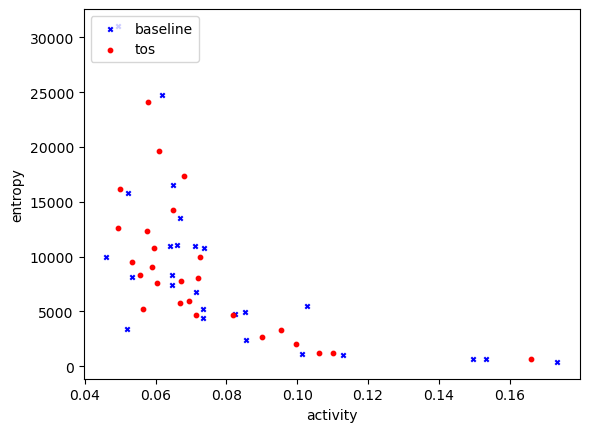

In [40]:
 # utilizo todo lo mismo de los ejemplos
afeatures1 = np.asarray(features_baseline)
afeatures2 = np.asarray(features_tos)

##el orden de los features son:
#0 ptp 
#1 rms
#2  crest factor
#3 entropy
#4,5 y6  activity, complexity, morbidit
#7 fractal

print (afeatures1.shape)
print( afeatures2.shape)

print (afeatures1.mean(0))
print (afeatures2.mean(0))

import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(afeatures1[:,3], afeatures1[:,4], s=10, c='b', marker="x", label='baseline')
ax1.scatter(afeatures2[:,3], afeatures2[:,4], s=10, c='r', marker="o", label='tos')
plt.xlabel('activity')
plt.ylabel('entropy')
plt.legend(loc='upper left')
plt.show()


Probando con los distintos features ningun parece a simple vista permitir una clasificación/separación

Feature 1 Size 26,8
Feature 2 Size 26,8
Boundary 26:
Training Dataset Size 26,8
Test Dataset Size 25,8
SVM Feature Dim: 2 Accuracy: 0.480000
[[3 9]
 [4 9]]
              precision    recall  f1-score   support

    baseline       0.43      0.25      0.32        12
         Tos       0.50      0.69      0.58        13

    accuracy                           0.48        25
   macro avg       0.46      0.47      0.45        25
weighted avg       0.47      0.48      0.45        25

LogReg Feature Dim: 2 Accuracy: 0.520000
[[5 7]
 [5 8]]
              precision    recall  f1-score   support

    baseline       0.50      0.42      0.45        12
         Tos       0.53      0.62      0.57        13

    accuracy                           0.52        25
   macro avg       0.52      0.52      0.51        25
weighted avg       0.52      0.52      0.52        25

1/1 [==============================] - 0s 125ms/step
Keras Feature Dim: 2 Accuracy: 0.400000
[[10  2]
 [13  0]]
1/1 [=================

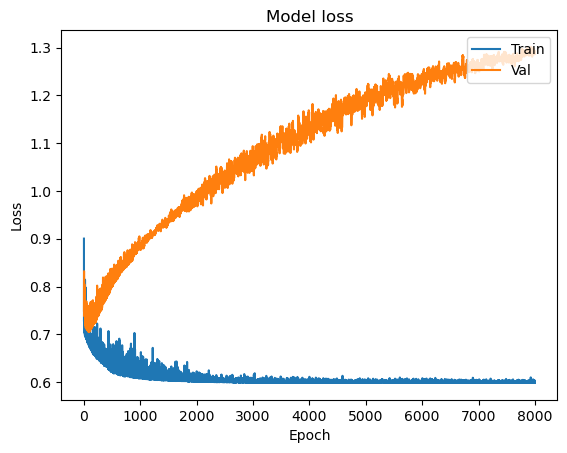

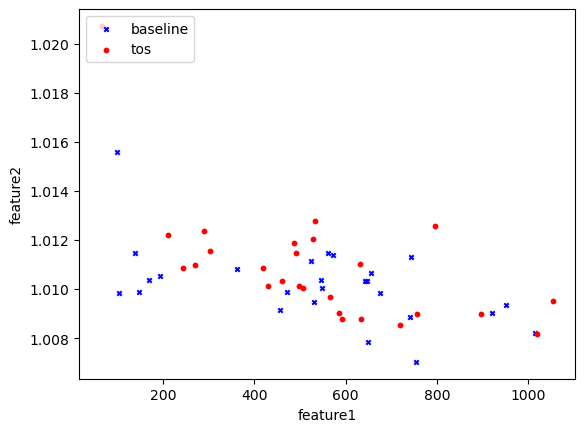

In [41]:
  

classify(afeatures1, afeatures2,2)
#classify(afeatures1, afeatures2,4)
#classify(afeatures1, afeatures2,8)

import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(afeatures1[:,0], afeatures1[:,1], s=10, c='b', marker="x", label='baseline')
ax1.scatter(afeatures2[:,0], afeatures2[:,1], s=10, c='r', marker="o", label='tos')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend(loc='upper left')
plt.show()   


    

In [42]:

def classify2(afeatures1, afeatures2):

    print ('Feature 1 Size %d,%d' % (afeatures1.shape))
    print ('Feature 2 Size %d,%d' % (afeatures2.shape))

   # afeatures1 = reshapefeature(afeatures1, featuresize)
  #  afeatures2 = reshapefeature(afeatures2, featuresize)

    featuredata = np.concatenate ((afeatures1,afeatures2))
    featurelabels = np.concatenate( (np.zeros(afeatures1.shape[0]),(np.zeros(afeatures2.shape[0])+1) )  )

    boundary = int(featuredata.shape[0]/2.0)

    print ('Boundary %d:' % boundary)

    # Reshape and shuffle the features
    reorder = np.random.permutation(featuredata.shape[0])

    trainingdata = featuredata[reorder[0:boundary]]
    traininglabels = featurelabels[reorder[0:boundary]]

    testdata = featuredata[reorder[boundary+1:featuredata.shape[0]]]
    testlabels = featurelabels[reorder[boundary+1:featuredata.shape[0]]]

    print ('Training Dataset Size %d,%d' % (trainingdata.shape))
    print ('Test Dataset Size %d,%d' % (testdata.shape))
    
    #SVM
    # Use SVM but instead of guessing the class (0 or 1), configure it to output the
    # probability value to belong to each class (this is needed to calculate ROC curves)
    clf = svm.SVC(kernel='linear', C = 1.0, probability=True)
    clf.fit(trainingdata,traininglabels)

    ns_probs = [0 for _ in range(len(testlabels))]
    
    # kNN
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(trainingdata,traininglabels)

    # LogReg
    from sklearn.linear_model import LogisticRegression
    logisticRegr = LogisticRegression()
    logisticRegr.fit(trainingdata,traininglabels)

    # LDA
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    ldaf = LinearDiscriminantAnalysis()
    ldaf.fit(trainingdata,traininglabels)

    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.pipeline import make_pipeline
    dt = DecisionTreeClassifier(random_state=0)
    dt.fit(trainingdata, traininglabels)
    #pipe3=make_pipeline(StandardScaler(),GridSearchCV(arbol,parameters2,cv=3))

    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import RandomForestRegressor
    frs = RandomForestClassifier(n_estimators=100, random_state=0)
    frs.fit(trainingdata, traininglabels)

    # predict probabilities
    sr_probs = clf.predict_proba(testdata)
    # keep probabilities for the positive outcome only
    sr_probs = sr_probs[:, 1]


    # predict probabilities
    kr_probs = model.predict_proba(testdata)
    # keep probabilities for the positive outcome only
    kr_probs = kr_probs[:, 1]


    # predict probabilities
    lr_probs = logisticRegr.predict_proba(testdata)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]

    # predict probabilities
    dr_probs = ldaf.predict_proba(testdata)
    # keep probabilities for the positive outcome only
    dr_probs = dr_probs[:, 1]

    # predict probabilities
    dt_probs = dt.predict_proba(testdata)
    # keep probabilities for the positive outcome only
    dt_probs = dt_probs[:, 1]

    # predict probabilities
    rf_probs = frs.predict_proba(testdata)
    # keep probabilities for the positive outcome only
    rf_probs = rf_probs[:, 1]


    # calculate scores
    ns_auc = roc_auc_score(testlabels, ns_probs)
    sr_auc = roc_auc_score(testlabels, sr_probs)
    kr_auc = roc_auc_score(testlabels, kr_probs)
    lr_auc = roc_auc_score(testlabels, lr_probs)
    dr_auc = roc_auc_score(testlabels, dr_probs)
    dt_auc = roc_auc_score(testlabels, dt_probs)
    rf_auc = roc_auc_score(testlabels, rf_probs)

    # summarize scores
    print('Trivial: ROC AUC=%.3f' % (ns_auc))
    print('SVM: ROC AUC=%.3f' % (sr_auc))
    print('kNN: ROC AUC=%.3f' % (kr_auc))
    print('LogReg: ROC AUC=%.3f' % (lr_auc))
    print('LDA: ROC AUC=%.3f' % (dr_auc))
    print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
    print('Random Forest: ROC AUC=%.3f' % (rf_auc))

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(testlabels, ns_probs)
    sr_fpr, sr_tpr, _ = roc_curve(testlabels, sr_probs)
    kr_fpr, kr_tpr, _ = roc_curve(testlabels, kr_probs)
    lr_fpr, lr_tpr, _ = roc_curve(testlabels, lr_probs)
    dr_fpr, dr_tpr, _ = roc_curve(testlabels, dr_probs)
    dt_fpr, dt_tpr, _ = roc_curve(testlabels, dt_probs)
    rf_fpr, rf_tpr, _ = roc_curve(testlabels, rf_probs)

    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Trivial')
    # plot the roc curve for the model
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Trivial')
    pyplot.plot(sr_fpr, sr_tpr, marker='.', label='SVM')
    # plot the roc curve for the model
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Trivial')
    pyplot.plot(sr_fpr, sr_tpr, marker='.', label='SVM')
    pyplot.plot(kr_fpr, kr_tpr, marker='.', label='kNN')
    # plot the roc curve for the model
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Trivial')
    pyplot.plot(sr_fpr, sr_tpr, marker='.', label='SVM')
    pyplot.plot(kr_fpr, kr_tpr, marker='.', label='kNN')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='LogReg')
    # plot the roc curve for the model
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Trivial')
    pyplot.plot(sr_fpr, sr_tpr, marker='.', label='SVM')
    pyplot.plot(kr_fpr, kr_tpr, marker='.', label='kNN')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='LogReg')
    pyplot.plot(dr_fpr, dr_tpr, marker='.', label='LDA')
    # plot the roc curve for the model
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Trivial')
    pyplot.plot(sr_fpr, sr_tpr, marker='.', label='SVM')
    pyplot.plot(kr_fpr, kr_tpr, marker='.', label='kNN')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='LogReg')
    pyplot.plot(dt_fpr, dt_tpr, marker='.', label='LDA')
    pyplot.plot(dr_fpr, dr_tpr, marker='.', label='DecTree')
    # plot the roc curve for the model
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Trivial')
    pyplot.plot(sr_fpr, sr_tpr, marker='.', label='SVM')
    pyplot.plot(kr_fpr, kr_tpr, marker='.', label='kNN')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='LogReg')
    pyplot.plot(dr_fpr, dr_tpr, marker='.', label='LDA')
    pyplot.plot(dt_fpr, dt_tpr, marker='.', label='DecTree')
    pyplot.plot(rf_fpr, rf_tpr, marker='.', label='RF')
    # plot the roc curve for the model
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

In [43]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

Feature 1 Size 26,8
Feature 2 Size 26,8
Boundary 26:
Training Dataset Size 26,8
Test Dataset Size 25,8
Trivial: ROC AUC=0.500
SVM: ROC AUC=0.649
kNN: ROC AUC=0.373
LogReg: ROC AUC=0.461
LDA: ROC AUC=0.500
Decision Tree: ROC AUC=0.432
Random Forest: ROC AUC=0.445


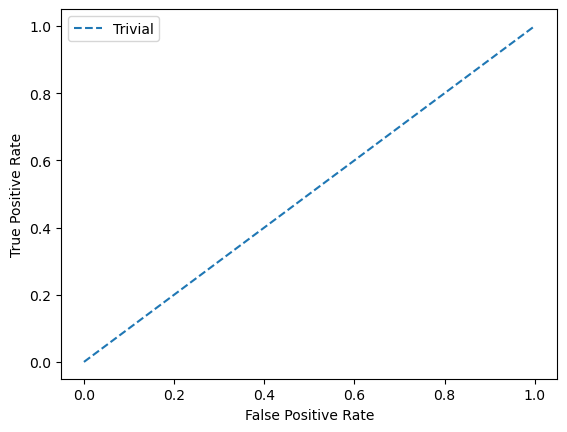

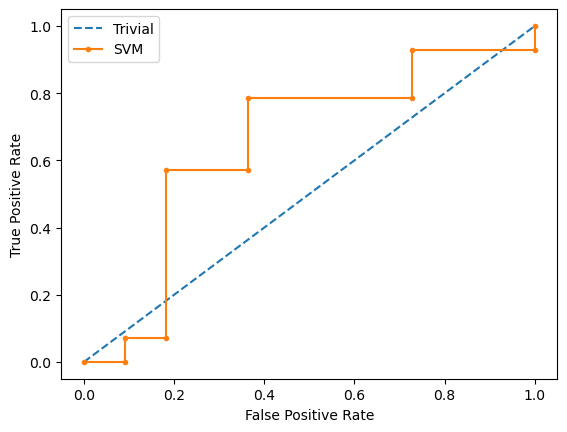

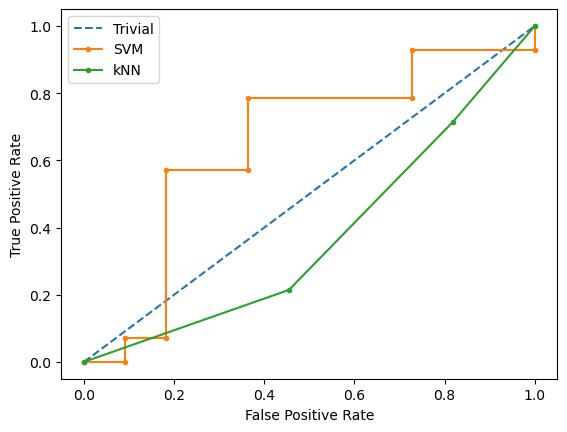

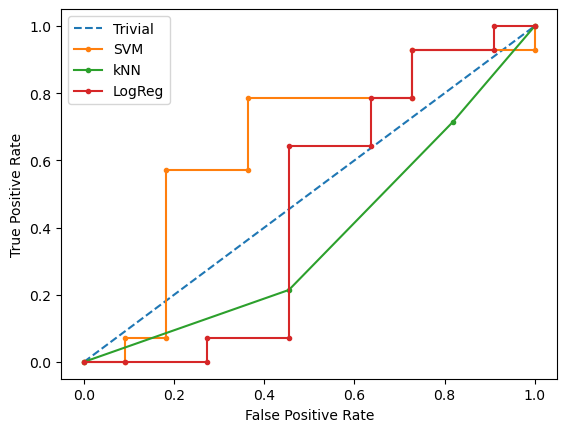

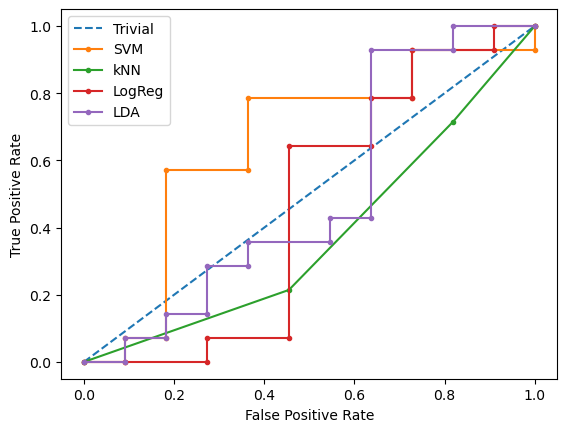

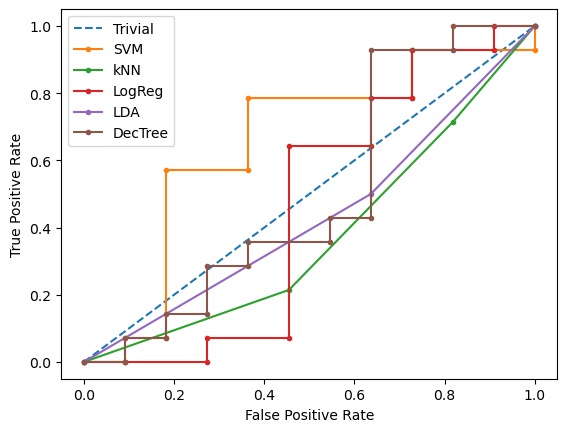

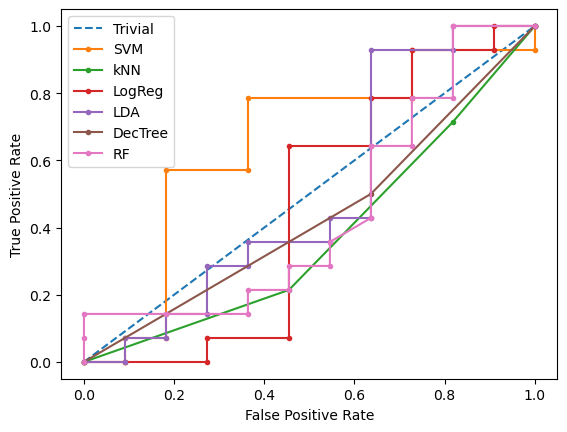

In [44]:
# Group time features in tuples, 4-tuples and 8-tuples and classify them
#classify(afeatures1, afeatures2,2)
#classify(afeatures1, afeatures2,4)

afeatures1 = np.asarray(features_baseline)
afeatures2 = np.asarray(features_tos)

classify2(afeatures1, afeatures2)


